# Spaceship Titanic Dataset

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__:Felipe Asbún

* __Rol__:202010509-K

# Import the library

In [ ]:
# Seaborn 0.13.0 es necesario para correr este código
import packaging.version
def is_newer_version(current_version, target_version):
    return packaging.version.parse(current_version) >= packaging.version.parse(target_version)

import pkg_resources
def get_package_version(package_name):
    try:
        version = pkg_resources.get_distribution(package_name).version
        return version
    except pkg_resources.DistributionNotFound:
        return f"{package_name} is not installed."
import subprocess

package_name = 'seaborn'
version = get_package_version(package_name)
target_version = '0.13.0'

if is_newer_version(version, target_version):
    print(f'The version {version} is newer than {target_version}.')
else:
    subprocess.run(['pip', 'install', '--upgrade', 'seaborn'])
    print(f'The {package_name} version is {version}. Restart the session for the new version.')

The version 0.13.0 is newer than 0.13.0.


In [ ]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/homeworks/project/'
data_train = pd.read_csv(data_path + 'train.csv')
data_test = pd.read_csv(data_path + 'test.csv')

La data se compone de 14 columnas, con un total de 8693 datos. Note que 12 columnas corresponden a atributos, siendo 'Transported' la columna correspondiente a la clase a predecir.

In [ ]:
# Display the first 5 examples
data_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


There are 12 feature columns. Using these features your model has to predict whether the passenger is rescued or not indicated by the column `Transported`.

# Estadística descriptiva

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
data_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Visualización descriptiva

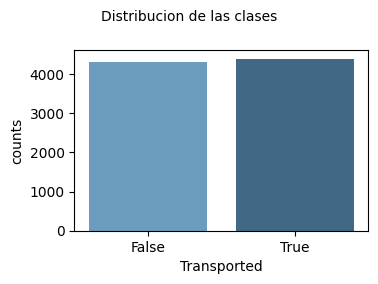

In [ ]:
gr = data_train.groupby(['Transported']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(4,3), nrows=1, ncols=1)
sns.barplot(data=gr, x='Transported', y='counts', palette="Blues_d",ax=ax)
fig.suptitle('Distribucion de las clases', size=10, y=0.95)
fig.tight_layout(pad=1.5)

# fig.savefig(data_path+'Distribucion_clases.png', format='png')

plt.show()

Train len:    8693
Test len:     4277


<function matplotlib.pyplot.show(close=None, block=None)>

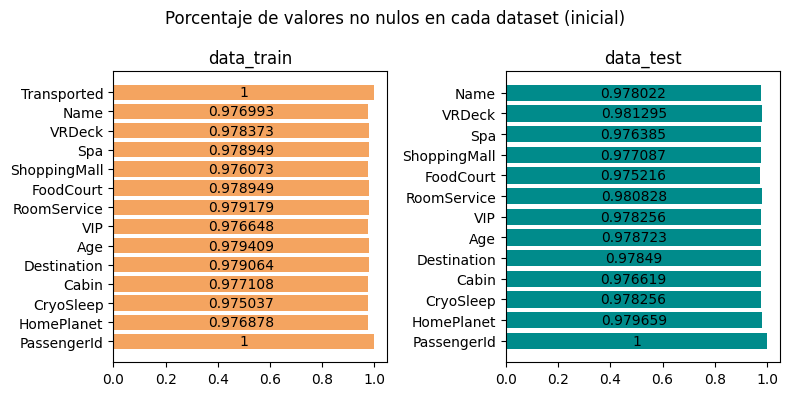

In [ ]:
n_train = data_train.shape[0]
n_test = data_test.shape[0]

print('Train len:   ', n_train)
print('Test len:    ', n_test)

fig, axes = plt.subplots(figsize=(8,4), nrows = 1, ncols = 2)
fig.suptitle('Porcentaje de valores no nulos en cada dataset (inicial)')
axes[0].set_title('data_train')
bars = axes[0].barh(data_train.columns, data_train.isna().sum().apply(lambda x: 1-x/n_train).values, color='sandybrown')
for bar in axes[0].containers:
    axes[0].bar_label(bars, label_type='center')

axes[1].set_title('data_test')
bars = axes[1].barh(data_test.columns, data_test.isna().sum().apply(lambda x: 1-x/n_test).values, color='darkcyan')
for bar in axes[1].containers:
    axes[1].bar_label(bars, label_type='center')

fig.tight_layout()
# fig.savefig(data_path+'Nan_values.png', format='png')
plt.show

In [ ]:
continuous_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']

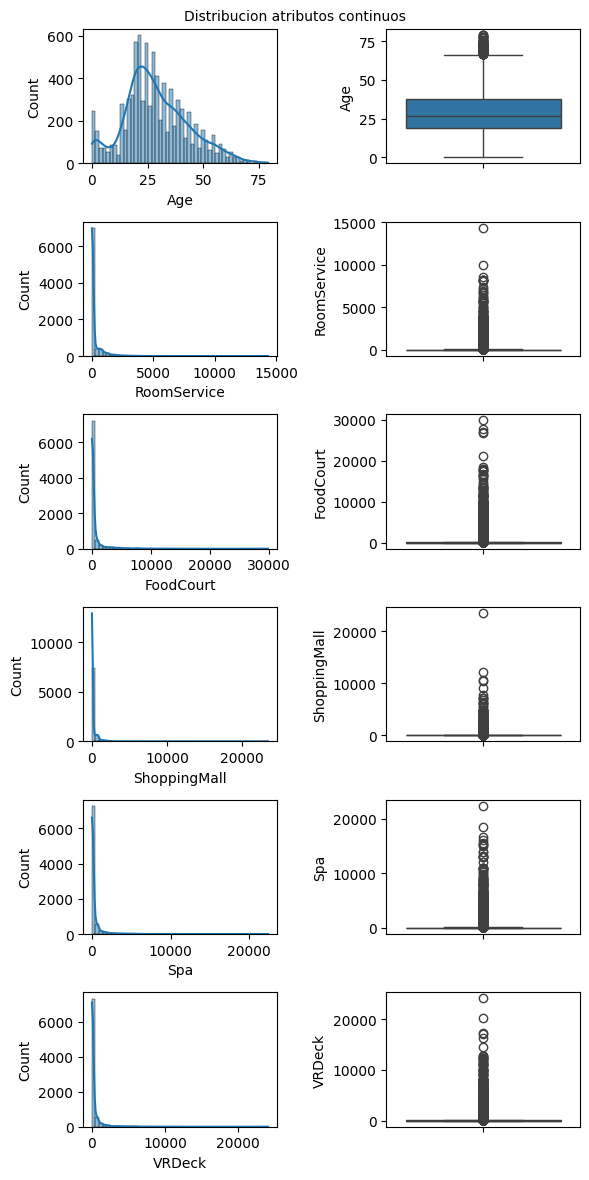

In [ ]:
fig, axes = plt.subplots(figsize=(6,12), nrows=len(continuous_features), ncols=2)
for i, f in enumerate(continuous_features):
    sns.histplot(data=data_train[f], bins=50, ax=axes[i, 0], kde=True)
    sns.boxplot(data_train[f], ax=axes[i,1])
fig.suptitle('Distribucion atributos continuos', size=10)
fig.tight_layout()
# fig.savefig(data_path+'Distribucion_continuos.png', format='png')
plt.show()

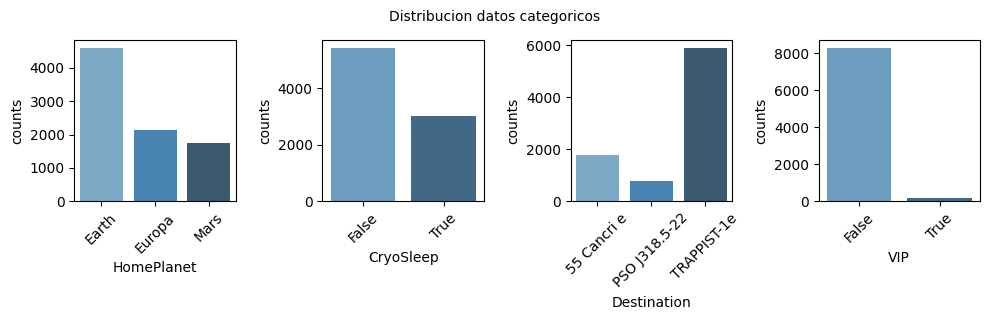

In [ ]:
fig, axes = plt.subplots(figsize=(10,3), nrows=1, ncols=4)
for i, column in enumerate(categorical_features):
    if i<len(categorical_features)-1:
        df_gb = data_train.groupby([column]).size().reset_index(name='counts')
        sns.barplot(data=df_gb, x=column, y='counts', palette="Blues_d",ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
fig.tight_layout()
fig.suptitle('Distribucion datos categoricos', y=1.05, size=10)
# fig.savefig(data_path+'Distribucion_categoricos.png', format='png')
plt.show()

# Preprocesamiento

Haremos el mismo procedimiento para train y test.

Dropearemos 'Name' y 'PassengerId'

In [ ]:
id_train = data_train['PassengerId']
id_test = data_test['PassengerId']

df_train = data_train.drop(columns=['PassengerId', 'Name'])

df_test = data_test.drop(columns=['PassengerId', 'Name'])

Para los atributos categóricos, codificaremos los NaN values como desconocidos.

In [ ]:
df_train[categorical_features] = df_train[categorical_features].fillna('Unknown')
df_test[categorical_features] = df_test[categorical_features].fillna('Unknown')

Para los atributos continuos, reemplazaremos los valores nulos por la mediana, debido a los outliers presentes en estos atributos, que sesgan la media.

In [ ]:
for col in continuous_features:
    m = data_train[col].median()
    df_train[col] = df_train[col].fillna(m)
    df_test[col] = df_test[col].fillna(m)

Train len:    8693
Test len:     4277


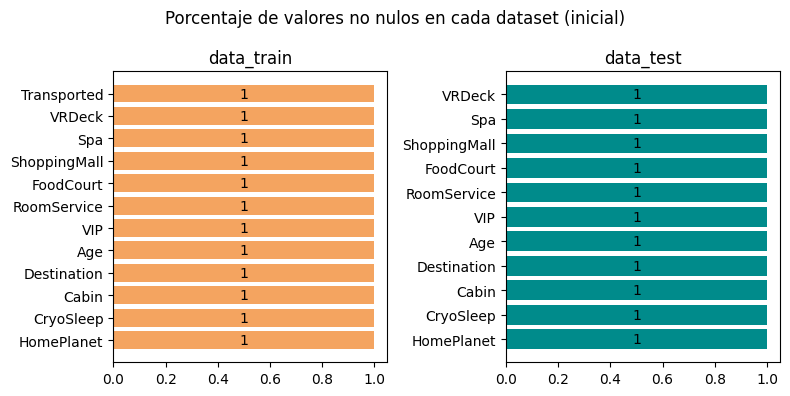

In [ ]:
n_train = df_train.shape[0]
n_test = df_test.shape[0]

print('Train len:   ', n_train)
print('Test len:    ', n_test)

fig, axes = plt.subplots(figsize=(8,4), nrows = 1, ncols = 2)
fig.suptitle('Porcentaje de valores no nulos en cada dataset (inicial)')
axes[0].set_title('data_train')
bars = axes[0].barh(df_train.columns, df_train.isna().sum().apply(lambda x: 1-x/n_train).values, color='sandybrown')
for bar in axes[0].containers:
    axes[0].bar_label(bars, label_type='center')

axes[1].set_title('data_test')
bars = axes[1].barh(df_test.columns, df_test.isna().sum().apply(lambda x: 1-x/n_test).values, color='darkcyan')
for bar in axes[1].containers:
    axes[1].bar_label(bars, label_type='center')

fig.tight_layout()
plt.show()

In [ ]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
df_test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


Codificaremos las columnas para que sean manejables por los modelos de sklearn.

Note que 'Cabin' tiene tres niveles de información. Los separaremos en columnas distintas.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_train['Transported'] = df_train['Transported'].astype(int)
df_train['CryoSleep'] = df_train['CryoSleep'].astype(str)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(str)
df_train['VIP'] = df_train['VIP'].astype(str)
df_test['VIP'] = df_test['VIP'].astype(str)

# Train
cabin_0 = []
cabin_1 = []
cabin_2 = []
serie = df_train['Cabin']
for i, s in enumerate(serie):
    if not s=='Unknown':
        split = df_train['Cabin'][i].split('/')
        cabin_0.append(split[0])
        cabin_1.append(split[1])
        cabin_2.append(split[2])
    else:
        cabin_0.append('Unknown')
        cabin_1.append(np.nan)
        cabin_2.append('Unknown')
df_train['Cabin_deck'] = cabin_0
df_train['Cabin_num'] = cabin_1
df_train['Cabin_side'] = cabin_2

#Test
cabin_0 = []
cabin_1 = []
cabin_2 = []
serie = df_test['Cabin']
for i, s in enumerate(serie):
    if not s=='Unknown':
        split = df_test['Cabin'][i].split('/')
        cabin_0.append(split[0])
        cabin_1.append(split[1])
        cabin_2.append(split[2])
    else:
        cabin_0.append('Unknown')
        cabin_1.append(np.nan)
        cabin_2.append('Unknown')
df_test['Cabin_deck'] = cabin_0
df_test['Cabin_num'] = cabin_1
df_test['Cabin_side'] = cabin_2


Note que 'Cabin_1' es variable continua

In [ ]:
df_train['Cabin_num'] = df_train['Cabin_num'].fillna(method='ffill')
df_test['Cabin_num'] = df_test['Cabin_num'].fillna(method='ffill')

df_train['Cabin_num'] = df_train['Cabin_num'].astype(int)
df_test['Cabin_num'] = df_test['Cabin_num'].astype(int)

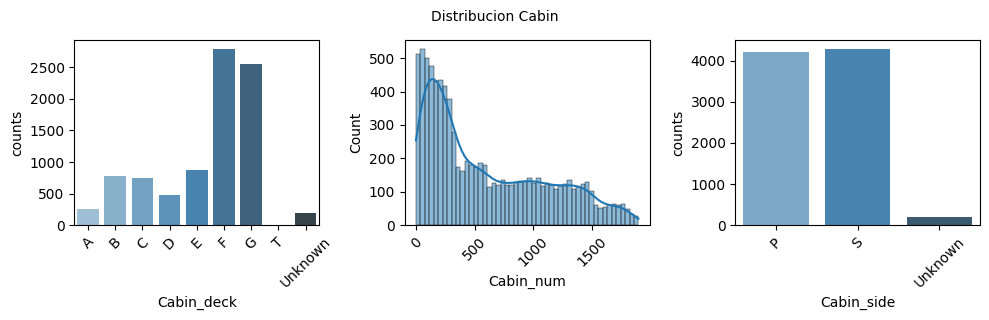

In [ ]:
fig, axes = plt.subplots(figsize=(10,3), nrows=1, ncols=3)
cabin = ['Cabin_deck', 'Cabin_num', 'Cabin_side']
for i, column in enumerate(cabin):
    if i==1:
        sns.histplot(data=df_train[column], bins=50, kde=True, ax=axes[i])
        axes[i].tick_params(axis='x', rotation=45)
    else:
        df_gb = df_train.groupby([column]).size().reset_index(name='counts')
        sns.barplot(data=df_gb, x=column, y='counts', palette="Blues_d",ax=axes[i], hue=column, legend=False)
        axes[i].tick_params(axis='x', rotation=45)
fig.tight_layout()
fig.suptitle('Distribucion Cabin', y=1.05, size=10)

fig.savefig(data_path+'Distribucion_cabin.png', format='png')
plt.show()

Finalmente, codifiquemos las variables categóricas y transformemos las continuas mediante MinMaxScaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

y_train = df_train['Transported']

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']
continuous_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_num']

cat_enc = OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist')

X_train = cat_enc.fit_transform(df_train[categorical_features])
X_test = cat_enc.transform(df_test[categorical_features])
X_train = pd.DataFrame(X_train, columns=cat_enc.get_feature_names_out(categorical_features))
X_test = pd.DataFrame(X_test, columns=cat_enc.get_feature_names_out(categorical_features))

cont_scaler = MinMaxScaler()
cont_scaler.fit(df_train[continuous_features])
cont_X_train = cont_scaler.transform(df_train[continuous_features])
cont_X_train = pd.DataFrame(cont_X_train, columns = cont_scaler.get_feature_names_out(continuous_features))
cont_X_test = cont_scaler.transform(df_test[continuous_features])
cont_X_test = pd.DataFrame(cont_X_test, columns = cont_scaler.get_feature_names_out(continuous_features))

X_train = pd.concat([cont_X_train, X_train], axis=1)
X_test = pd.concat([cont_X_test, X_test], axis=1)


In [ ]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_deck_Unknown,Cabin_side_P,Cabin_side_S,Cabin_side_Unknown
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.000528,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_deck_Unknown,Cabin_side_P,Cabin_side_S,Cabin_side_Unknown
0,0.341772,0.000000,0.000000,0.00000,0.000000,0.000000,0.001584,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.240506,0.000000,0.000302,0.00000,0.125982,0.000000,0.002112,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.392405,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.481013,0.000000,0.223124,0.00000,0.008077,0.024241,0.000528,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.253165,0.000698,0.000000,0.02703,0.000000,0.000000,0.002640,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

# Seleccion de modelos

Escogeremos los siguientes modelos a entrenar, junto con sus optimizaciones de hiperparámetros

* Support Vector Machines
* Logistic Regression
* Random Forest Classifier
* Gradient Boosting Classifier


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

## Support Vector Machine

In [ ]:
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': np.logspace(-2, 2, num=5, base=10.0, endpoint=True),
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

svm = SVC(max_iter=100000, cache_size=1000, random_state=42)
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_svm.fit(X_train, y_train)

print("Best Parameters: ", grid_svm.best_params_)
print("Best Cross-Validated Accuracy: {:.5f}".format(grid_svm.best_score_))

best_svm = grid_svm.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:  {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validated Accuracy: 0.78488


## Logistic Regression

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-3, 3, num=7, base=10.0, endpoint=True),
    'solver': ['liblinear', 'saga']
}

log = LogisticRegression(random_state=42)
grid_log = GridSearchCV(log, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_log.fit(X_train, y_train)

print("Best Parameters: ", grid_log.best_params_)
print("Best Cross-Validated Accuracy: {:.5f}".format(grid_log.best_score_))

best_log = grid_log.best_estimator_

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Parameters:  {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validated Accuracy: 0.78672


## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [0.01, 0.05, 0.1],
}

rand_forest = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rand_forest, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_rf.fit(X_train, y_train)

print("Best Parameters: ", grid_rf.best_params_)
print("Best Cross-Validated Accuracy: {:.5f}".format(grid_rf.best_score_))

best_rand_forest = grid_rf.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'max_depth': 10, 'min_samples_split': 0.01, 'n_estimators': 1000}
Best Cross-Validated Accuracy: 0.79352


In [ ]:
best_rand_forest.score(X_train, y_train)

0.8178994593350972

## Gradient Boosting

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [100, 1000, 5000],
    'max_depth': [3, 5, 10]
}

gbc = GradientBoostingClassifier(random_state=42)
grid_gbc = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_gbc.fit(X_train, y_train)

print("Best Parameters: ", grid_gbc.best_params_)
print("Best Cross-Validated Accuracy: {:.5f}".format(grid_gbc.best_score_))

best_gbc = grid_gbc.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Best Cross-Validated Accuracy: 0.78995


# Análisis de resultados

## Support Vector Machine

Train Set Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4315
           1       0.82      0.82      0.82      4378

    accuracy                           0.82      8693
   macro avg       0.82      0.82      0.82      8693
weighted avg       0.82      0.82      0.82      8693



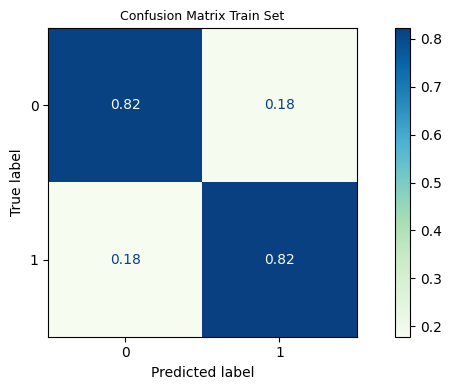

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_train = best_svm.predict(X_train)
print('Train Set Report:')
print(classification_report(y_train, y_pred_train))

fig, ax = plt.subplots(figsize=(8,4), ncols=1, nrows=1)

cm_train = confusion_matrix(y_train, y_pred_train, normalize='true')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train = disp_train.plot(ax=ax,cmap=plt.cm.GnBu)
ax.set_title('Confusion Matrix Train Set', size=9)

fig.tight_layout()

plt.show()

## Logistic Regression

Train Set Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      4315
           1       0.78      0.81      0.80      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693



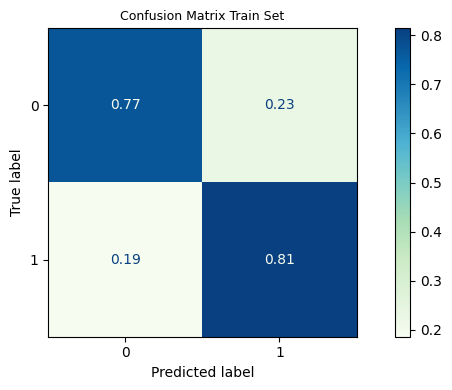

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_train = best_log.predict(X_train)
print('Train Set Report:')
print(classification_report(y_train, y_pred_train))

fig, ax = plt.subplots(figsize=(8,4), ncols=1, nrows=1)

cm_train = confusion_matrix(y_train, y_pred_train, normalize='true')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train = disp_train.plot(ax=ax,cmap=plt.cm.GnBu)
ax.set_title('Confusion Matrix Train Set', size=9)

fig.tight_layout()
plt.show()

## Random Forest

Train Set Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      4315
           1       0.82      0.82      0.82      4378

    accuracy                           0.82      8693
   macro avg       0.82      0.82      0.82      8693
weighted avg       0.82      0.82      0.82      8693



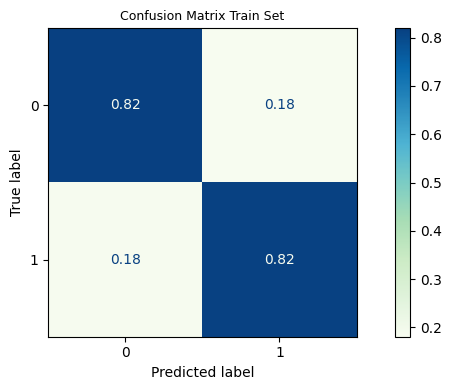

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_train = best_rand_forest.predict(X_train)
print('Train Set Report:')
print(classification_report(y_train, y_pred_train))

fig, ax = plt.subplots(figsize=(8,4), ncols=1, nrows=1)

cm_train = confusion_matrix(y_train, y_pred_train, normalize='true')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train = disp_train.plot(ax=ax,cmap=plt.cm.GnBu)
ax.set_title('Confusion Matrix Train Set', size=9)

fig.tight_layout()
plt.show()

## Gradient Boosting

Train Set Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      4315
           1       0.80      0.85      0.83      4378

    accuracy                           0.82      8693
   macro avg       0.82      0.82      0.82      8693
weighted avg       0.82      0.82      0.82      8693



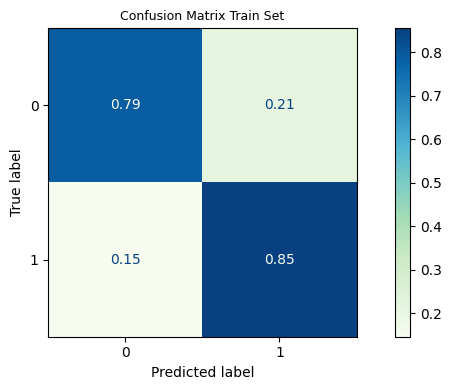

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_train = best_gbc.predict(X_train)
print('Train Set Report:')
print(classification_report(y_train, y_pred_train))

fig, ax = plt.subplots(figsize=(8,4), ncols=1, nrows=1)

cm_train = confusion_matrix(y_train, y_pred_train, normalize='true')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=[0, 1])
disp_train = disp_train.plot(ax=ax,cmap=plt.cm.GnBu)
ax.set_title('Confusion Matrix Train Set', size=9)

fig.tight_layout()
plt.show()

# Visualización de modelos




## Support Vector Machine

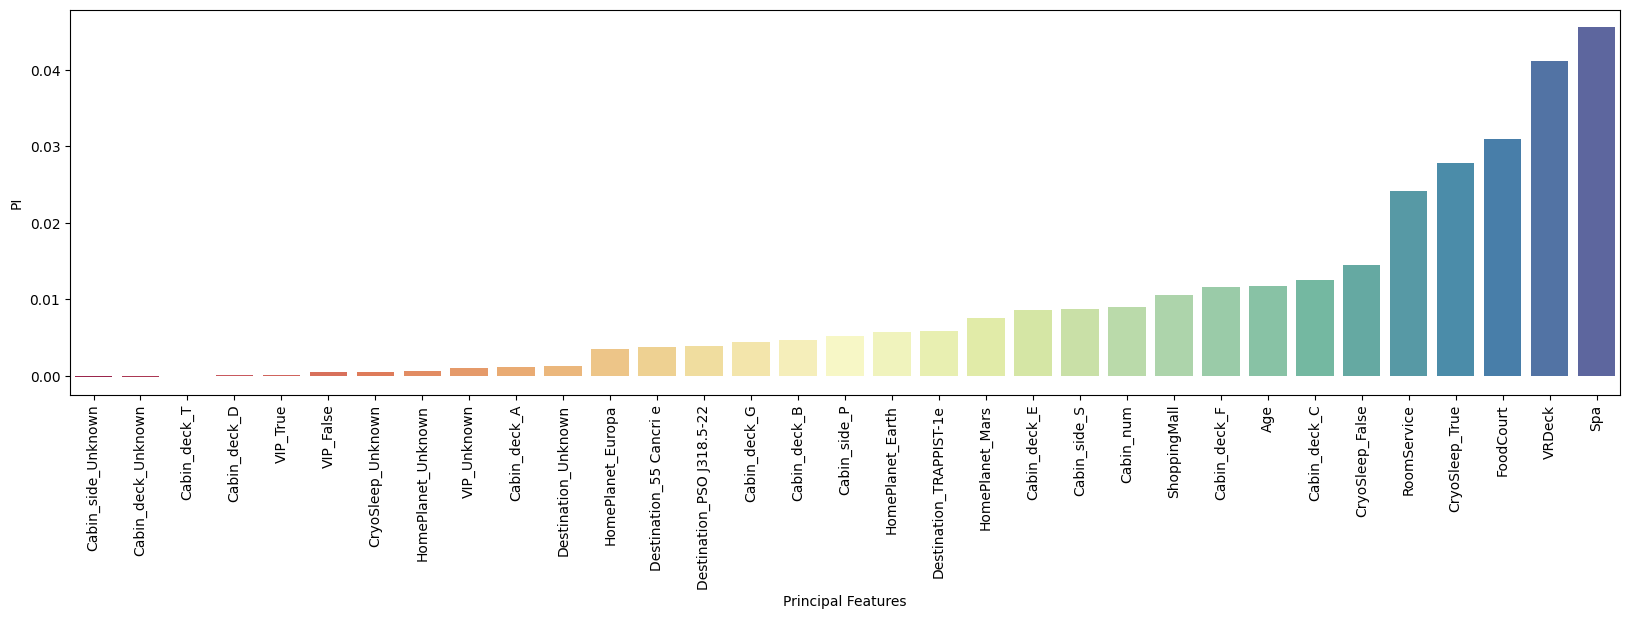

In [ ]:
from sklearn.inspection import permutation_importance

scores = permutation_importance(best_svm, X_train, y_train, n_repeats=5,random_state=0)
idx = np.argsort(scores.importances_mean)

pf_by_pi = pd.DataFrame(
    {
    'Principal Features': X_train.columns[idx].tolist(),
    'PI': (scores.importances_mean).reshape(scores.importances_mean.shape[0])[idx]
    }
)

fig, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=1)
sns.barplot(data=pf_by_pi, x='Principal Features', y='PI', ax=axes, palette='Spectral', hue='Principal Features', legend=False)
_=plt.xticks(rotation=90)

## Logistic Regression

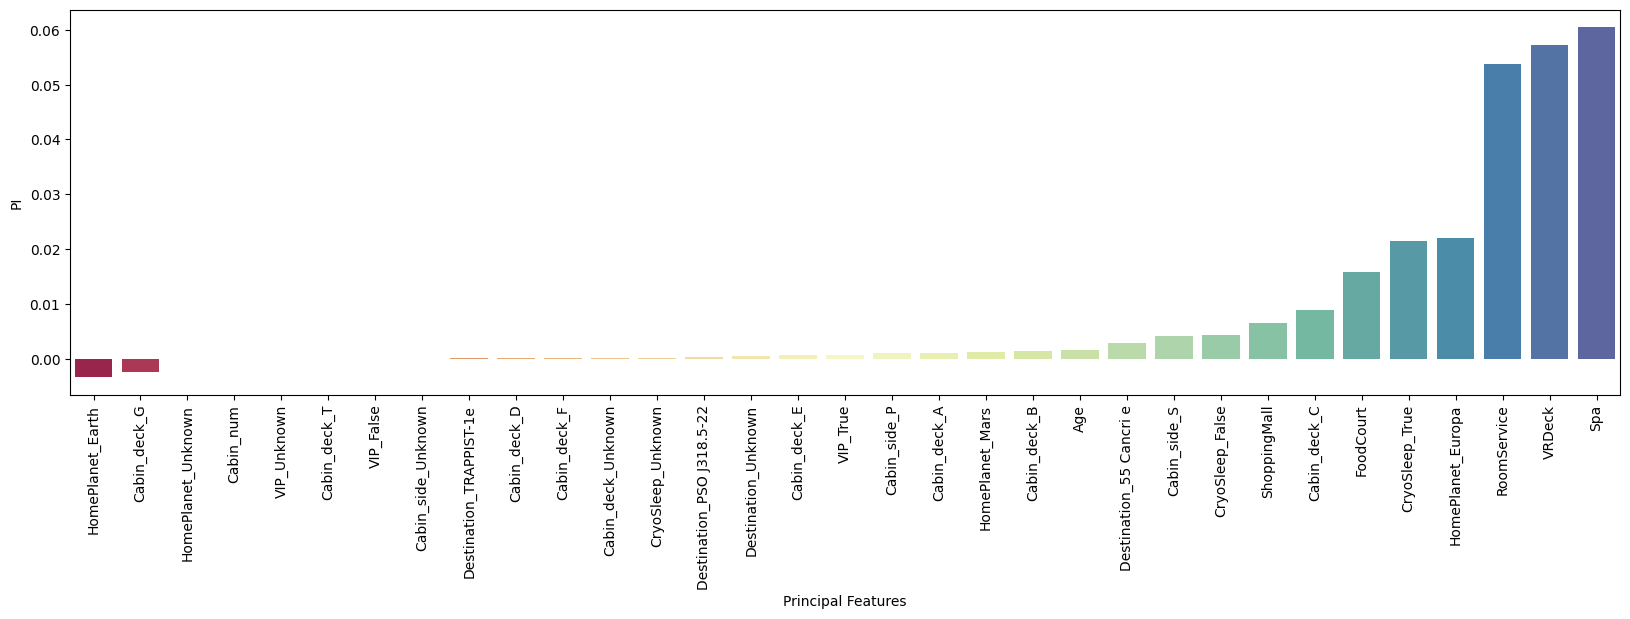

In [ ]:
from sklearn.inspection import permutation_importance

scores = permutation_importance(best_log, X_train, y_train, n_repeats=5,random_state=0)
idx = np.argsort(scores.importances_mean)

# idx = idx[:20]
pf_by_pi = pd.DataFrame(
    {
    'Principal Features': X_train.columns[idx].tolist(),
    'PI': (scores.importances_mean).reshape(scores.importances_mean.shape[0])[idx]
    }
)

fig, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=1)
sns.barplot(data=pf_by_pi, x='Principal Features', y='PI', ax=axes, palette='Spectral', hue='Principal Features', legend=False)
_=plt.xticks(rotation=90)

## Random Forest

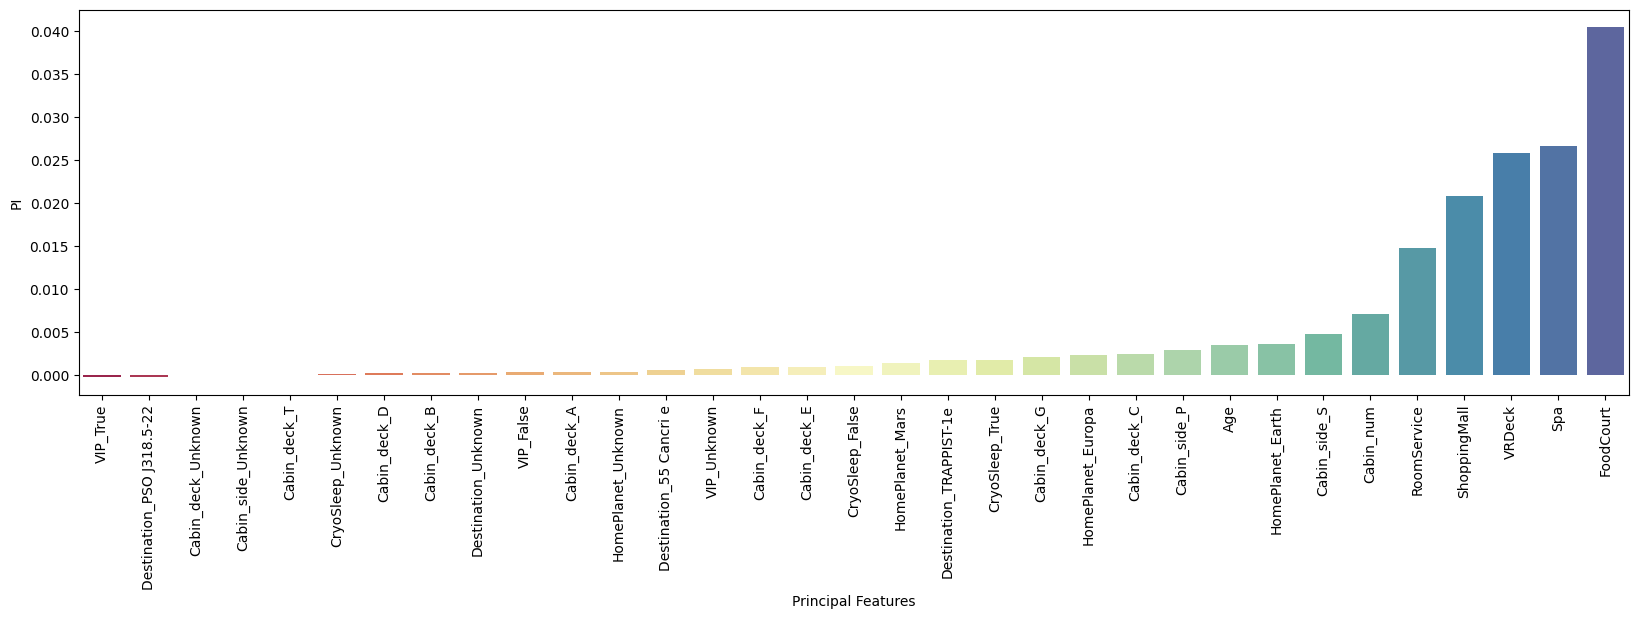

In [ ]:
from sklearn.inspection import permutation_importance

scores = permutation_importance(best_rand_forest, X_train, y_train, n_repeats=5,random_state=0)
idx = np.argsort(scores.importances_mean)

# idx = idx[:20]
pf_by_pi = pd.DataFrame(
    {
    'Principal Features': X_train.columns[idx].tolist(),
    'PI': (scores.importances_mean).reshape(scores.importances_mean.shape[0])[idx]
    }
)

fig, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=1)
sns.barplot(data=pf_by_pi, x='Principal Features', y='PI', ax=axes, palette='Spectral', hue='Principal Features', legend=False)
_=plt.xticks(rotation=90)

## Gradient Boosting

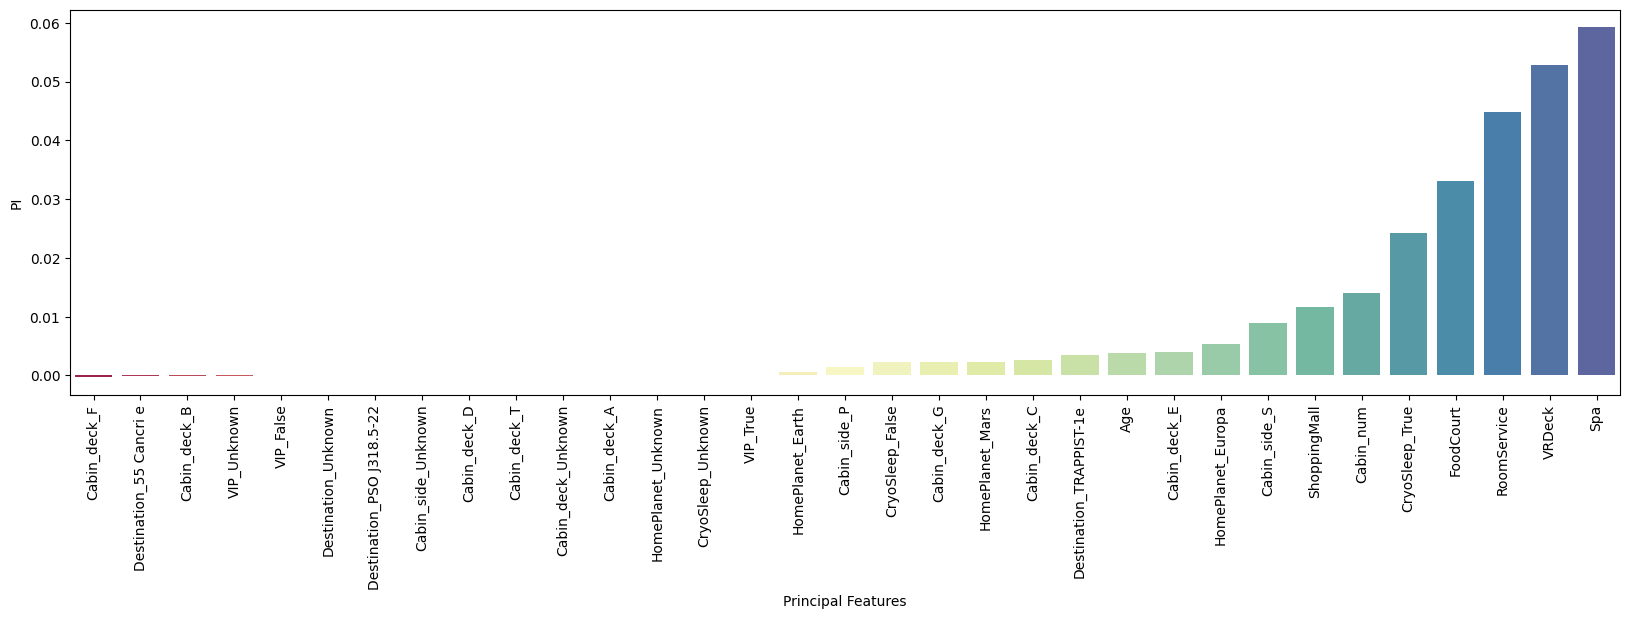

In [ ]:
from sklearn.inspection import permutation_importance

scores = permutation_importance(best_gbc, X_train, y_train, n_repeats=5,random_state=0)
idx = np.argsort(scores.importances_mean)

pf_by_pi = pd.DataFrame(
    {
    'Principal Features': X_train.columns[idx].tolist(),
    'PI': (scores.importances_mean).reshape(scores.importances_mean.shape[0])[idx]
    }
)

fig, axes = plt.subplots(figsize=(20,5), nrows=1, ncols=1)
sns.barplot(data=pf_by_pi, x='Principal Features', y='PI', ax=axes, palette='Spectral', hue='Principal Features', legend=False)
_=plt.xticks(rotation=90)

# Submission

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(min_samples_split=0.01, max_depth=10, n_estimators=1000)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
y_pred_bool = []
for i in y_pred:
    if i==1:
        y_pred_bool.append(True)
    else:
        y_pred_bool.append(False)

submission = pd.DataFrame({'PassengerId': id_test, 'Transported':y_pred_bool})

submission.to_csv('submission_spaceship_titanic_v1.csv',index=False)

# Conclusiones


Del resultado de los modelos, podemos concluir que Random Forest tuvo el mejor rendimiento, pues tuvo el mayor Cross Validation score, y no sufre de tanto overfitting, pues su score es similar al Train score.

En general, todos los modelos consideran importantes los atributos

- Spa
- VRDeck
- RoomService
- FoodCourt

que corresponden a los atributos continuos. Sin embargo, note que el efecto de una variable categórica se diluye en sus valores, por lo que variables como Cabin también son relevantes.